In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
df = pd.read_csv("C:\\Users\\SLAYER\OneDrive\\Desktop\\Python Çalışma\\Kanada\\farm_production_dataset.csv")

In [49]:
df.head()

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208


In [50]:
df.columns

Index(['REF_DATE', 'GEO', 'Type of crop',
       'Average farm price (dollars per tonne)',
       'Average yield (kilograms per hectare)', 'Production (metric tonnes)',
       'Seeded area (acres)', 'Seeded area (hectares)',
       'Total farm value (dollars)'],
      dtype='object')

In [51]:
df.nunique

<bound method DataFrame.nunique of        REF_DATE GEO             Type of crop  \
0          1908  AB                   Barley   
1          1908  AB                 Flaxseed   
2          1908  AB                     Oats   
3          1908  AB                 Rye, all   
4          1908  AB              Sugar beets   
...         ...  ..                      ...   
10268      1984  SK                 Tame hay   
10269      1984  SK               Wheat, all   
10270      1984  SK             Wheat, durum   
10271      1984  SK            Wheat, spring   
10272      1984  SK  Wheat, winter remaining   

       Average farm price (dollars per tonne)  \
0                                       15.00   
1                                       29.00   
2                                       18.00   
3                                       23.00   
4                                        0.55   
...                                       ...   
10268                                   78.00

In [52]:
df.shape

(10273, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10273 entries, 0 to 10272
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   REF_DATE                                10273 non-null  int64  
 1   GEO                                     10273 non-null  object 
 2   Type of crop                            10272 non-null  object 
 3   Average farm price (dollars per tonne)  10243 non-null  float64
 4   Average yield (kilograms per hectare)   10246 non-null  float64
 5   Production (metric tonnes)              10245 non-null  float64
 6   Seeded area (acres)                     9873 non-null   float64
 7   Seeded area (hectares)                  9847 non-null   float64
 8   Total farm value (dollars)              10273 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 722.4+ KB


In [54]:
df.isnull().sum()

REF_DATE                                    0
GEO                                         0
Type of crop                                1
Average farm price (dollars per tonne)     30
Average yield (kilograms per hectare)      27
Production (metric tonnes)                 28
Seeded area (acres)                       400
Seeded area (hectares)                    426
Total farm value (dollars)                  0
dtype: int64

In [55]:
df = df.dropna()

In [56]:
df.isnull().sum()

REF_DATE                                  0
GEO                                       0
Type of crop                              0
Average farm price (dollars per tonne)    0
Average yield (kilograms per hectare)     0
Production (metric tonnes)                0
Seeded area (acres)                       0
Seeded area (hectares)                    0
Total farm value (dollars)                0
dtype: int64

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_DATE,9844.0,1.947204e+03,2.216429e+01,1908.0,1928.0,1948.0,1966.00,1984.0
Average farm price (dollars per tonne),9844.0,5.861939e+01,6.376356e+01,0.0,20.0,43.0,75.00,677.0
Average yield (kilograms per hectare),9844.0,3.688334e+03,6.809443e+03,0.0,1055.0,1492.5,2400.00,52700.0
Production (metric tonnes),9844.0,1.029129e+06,2.798636e+06,0.0,7700.0,68800.0,572000.00,26714750.0
Seeded area (acres),9844.0,1.281703e+06,3.708696e+06,0.0,10800.0,83771.5,590000.00,33807000.0
Seeded area (hectares),9844.0,5.187427e+05,1.500931e+06,0.0,4350.0,34000.0,238850.00,13680500.0
Total farm value (dollars),9844.0,5.621697e+04,2.533259e+05,0.0,346.0,2920.5,19411.75,4654194.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9844 entries, 0 to 10271
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   REF_DATE                                9844 non-null   int64  
 1   GEO                                     9844 non-null   object 
 2   Type of crop                            9844 non-null   object 
 3   Average farm price (dollars per tonne)  9844 non-null   float64
 4   Average yield (kilograms per hectare)   9844 non-null   float64
 5   Production (metric tonnes)              9844 non-null   float64
 6   Seeded area (acres)                     9844 non-null   float64
 7   Seeded area (hectares)                  9844 non-null   float64
 8   Total farm value (dollars)              9844 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 769.1+ KB


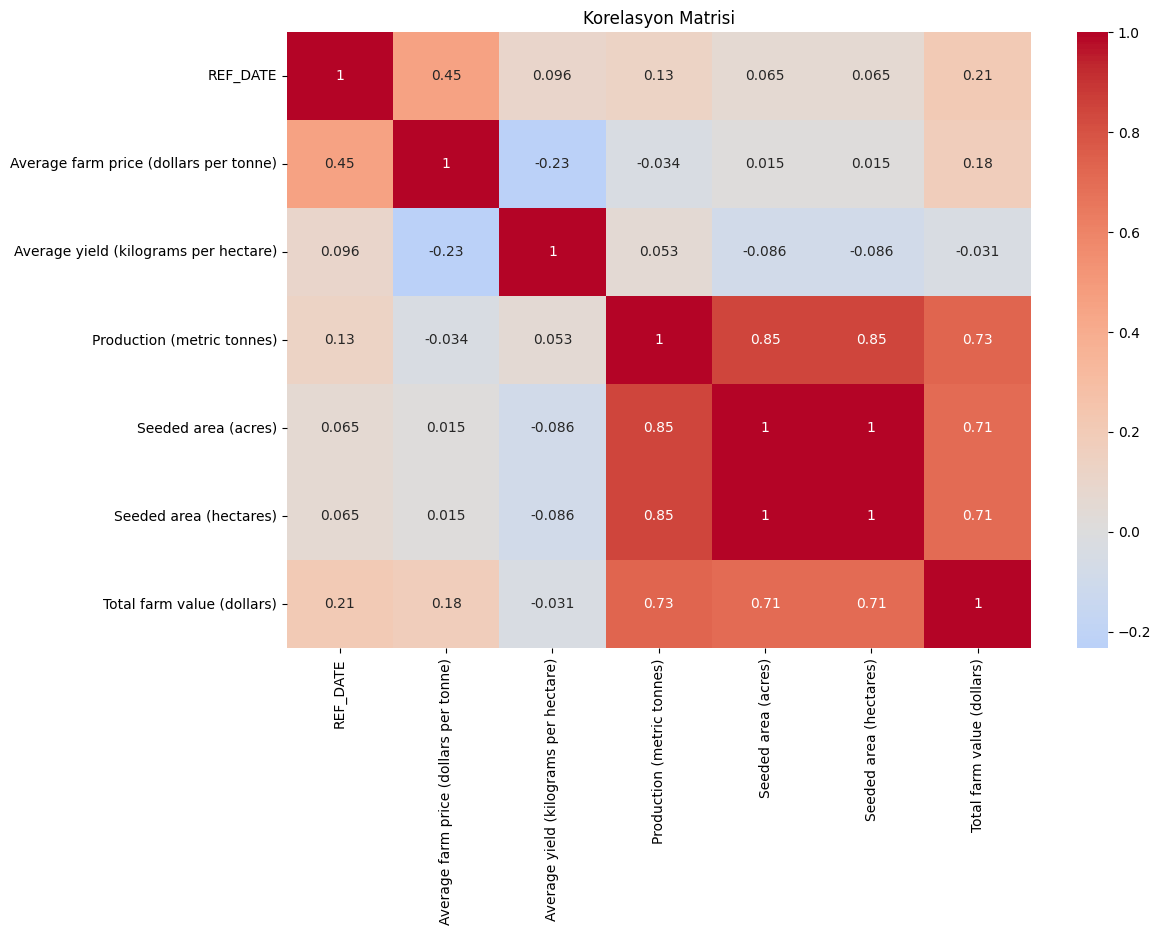

In [59]:
# Sadece sayısal sütunları seçerek korelasyon analizi yapın
numeric_columns = ['REF_DATE', 'Average farm price (dollars per tonne)', 'Average yield (kilograms per hectare)',
                  'Production (metric tonnes)', 'Seeded area (acres)', 'Seeded area (hectares)', 'Total farm value (dollars)']

# Korelasyon matrisini oluşturun
correlation_matrix = df[numeric_columns].corr()

# Daha iyi görselleştirme için seaborn kullanabilirsiniz
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasyon Matrisi')
plt.show()

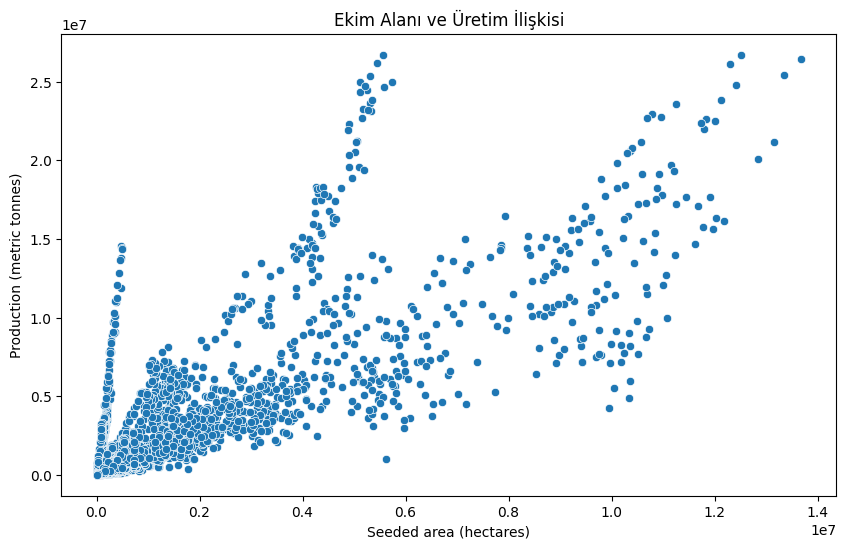

In [60]:
# Örnek: İki değişken arasındaki ilişkiyi scatter plot ile gösterme
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Seeded area (hectares)', y='Production (metric tonnes)')
plt.title('Ekim Alanı ve Üretim İlişkisi')
plt.show()

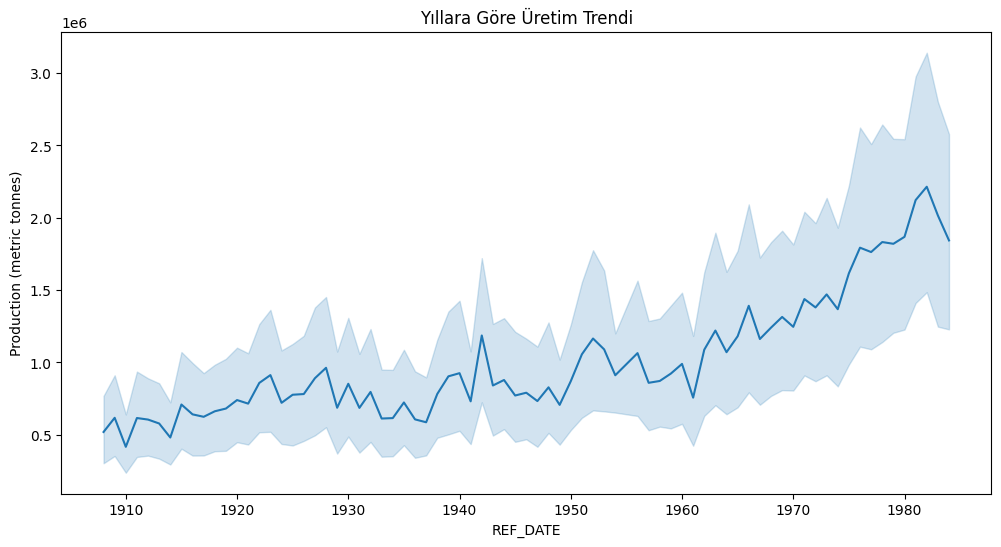

In [61]:
# Yıllara göre üretim trendi
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='REF_DATE', y='Production (metric tonnes)')
plt.title('Yıllara Göre Üretim Trendi')
plt.show()

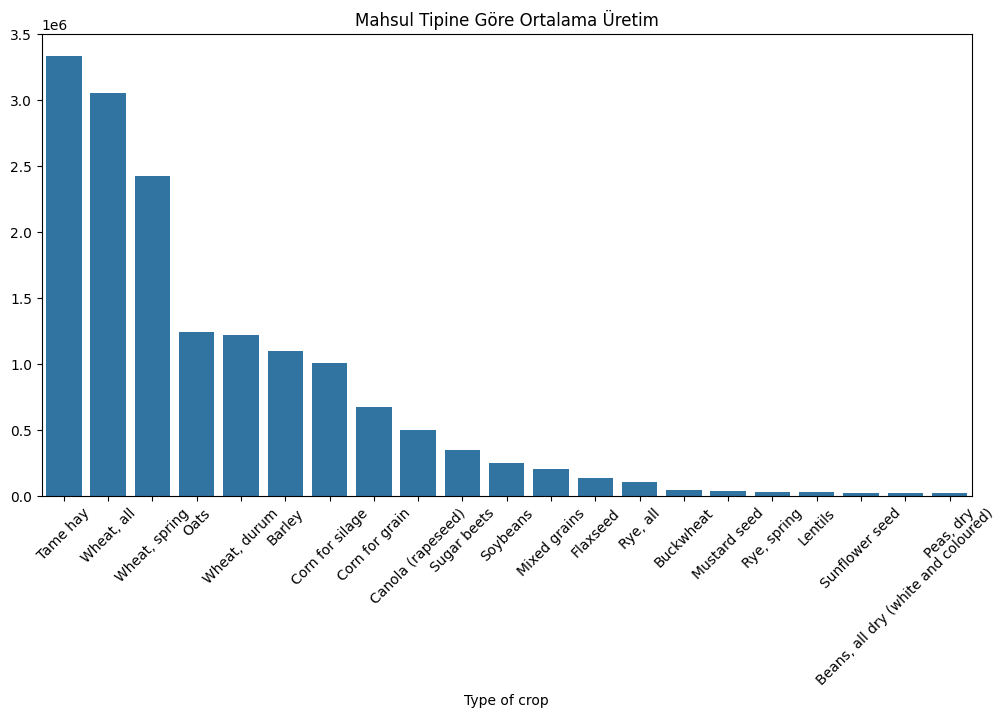

In [62]:
# Mahsul tipine göre ortalama üretim
avg_production = df.groupby('Type of crop')['Production (metric tonnes)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_production.index, y=avg_production.values)
plt.xticks(rotation=45)
plt.title('Mahsul Tipine Göre Ortalama Üretim')
plt.show()

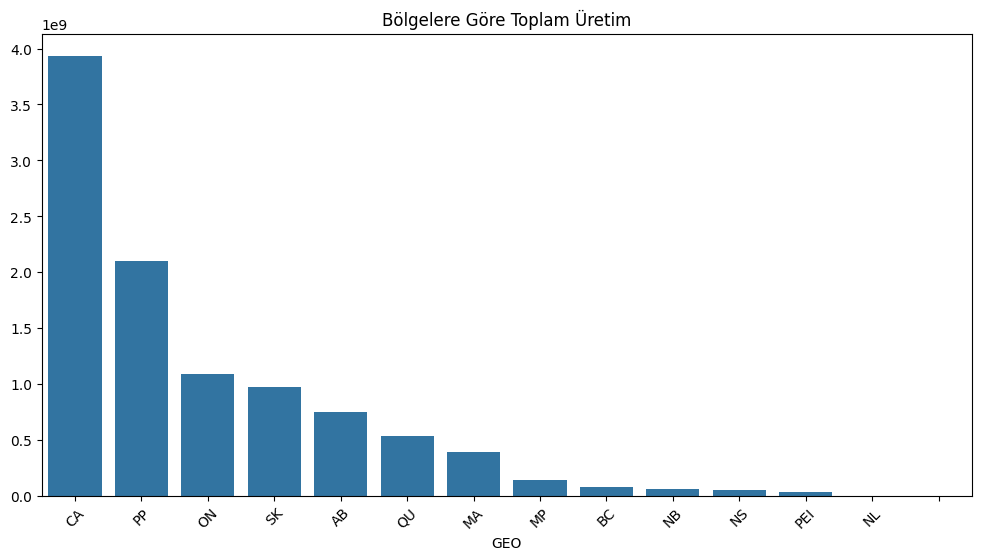

In [63]:
# Bölgelere göre toplam üretim
total_by_region = df.groupby('GEO')['Production (metric tonnes)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_by_region.index, y=total_by_region.values)
plt.xticks(rotation=45)
plt.title('Bölgelere Göre Toplam Üretim')
plt.show()

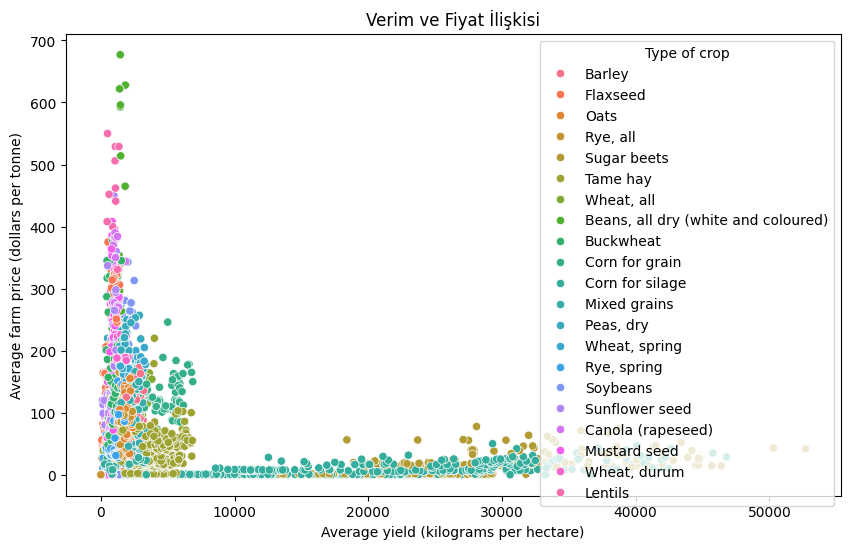

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average yield (kilograms per hectare)', 
                y='Average farm price (dollars per tonne)', 
                hue='Type of crop')
plt.title('Verim ve Fiyat İlişkisi')
plt.show()

In [65]:
# Mahsul tipine göre ortalama değerler
agg_by_crop = df.groupby('Type of crop').agg({
    'Average farm price (dollars per tonne)': 'mean',
    'Average yield (kilograms per hectare)': 'mean',
    'Production (metric tonnes)': 'mean',
    'Total farm value (dollars)': 'mean'
}).round(2)

print("Mahsul Tipine Göre Ortalama Değerler:")
print(agg_by_crop)

Mahsul Tipine Göre Ortalama Değerler:
                                     Average farm price (dollars per tonne)  \
Type of crop                                                                  
Barley                                                                49.54   
Beans, all dry (white and coloured)                                  138.46   
Buckwheat                                                             61.85   
Canola (rapeseed)                                                    147.26   
Corn for grain                                                        58.60   
Corn for silage                                                        4.68   
Flaxseed                                                             108.30   
Lentils                                                              419.25   
Mixed grains                                                          47.18   
Mustard seed                                                         158.72   
Oats          

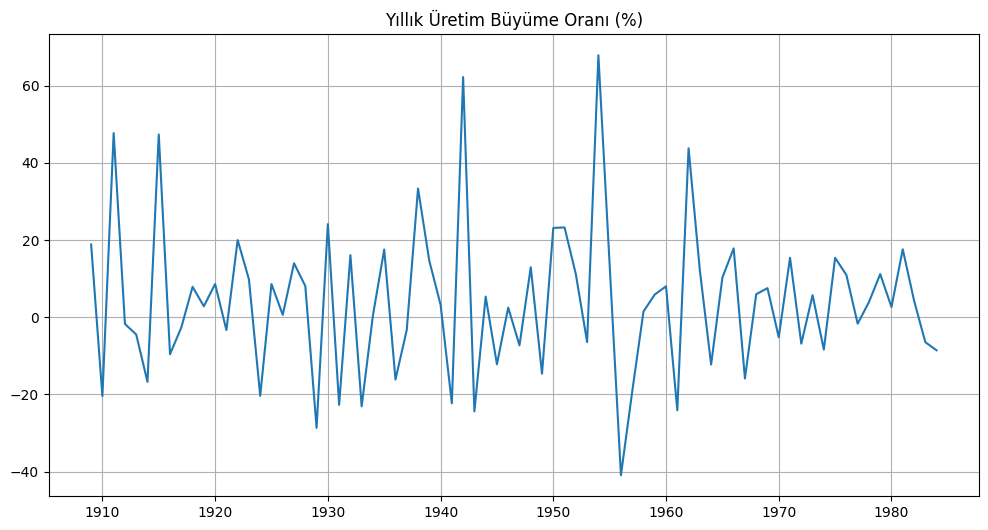

In [66]:
# Yıllık üretim büyüme oranı
annual_production = df.groupby('REF_DATE')['Production (metric tonnes)'].sum()
growth_rate = ((annual_production - annual_production.shift(1)) / annual_production.shift(1) * 100).round(2)

plt.figure(figsize=(12, 6))
plt.plot(growth_rate.index, growth_rate.values)
plt.title('Yıllık Üretim Büyüme Oranı (%)')
plt.grid(True)
plt.show()

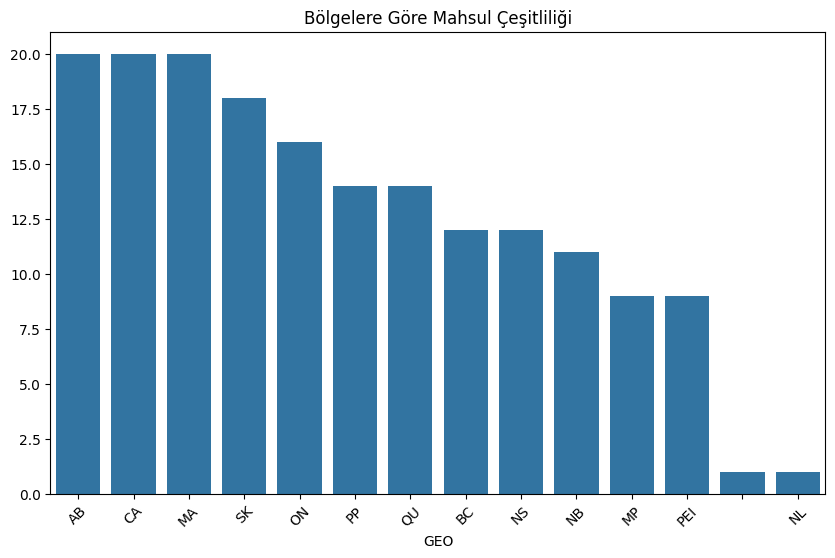

In [67]:
# Bölgelere göre yetiştirilen mahsul çeşidi sayısı
crop_diversity = df.groupby('GEO')['Type of crop'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=crop_diversity.index, y=crop_diversity.values)
plt.title('Bölgelere Göre Mahsul Çeşitliliği')
plt.xticks(rotation=45)
plt.show()

In [68]:
# Sayısal sütunları seçelim
numeric_columns = ['Average farm price (dollars per tonne)', 'Average yield (kilograms per hectare)',
                  'Production (metric tonnes)', 'Seeded area (acres)', 'Seeded area (hectares)',
                  'Total farm value (dollars)']

# Aykırı değerleri sınırlama fonksiyonu
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Tüm sayısal sütunlar için aykırı değerleri sınırlayalım
df_cleaned = df.copy()
for column in numeric_columns:
    df_cleaned = cap_outliers(df_cleaned, column)

In [69]:
# One-hot encoding uygulayalım
df_encoded = pd.get_dummies(df_cleaned, columns=['GEO', 'Type of crop'])

In [70]:
# Bağımlı ve bağımsız değişkenleri ayıralım
X = df_encoded.drop('Production (metric tonnes)', axis=1)
y = df_encoded['Production (metric tonnes)']

# Veriyi bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirelim
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# Parametre ızgarasını tanımlayalım
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV nesnesini oluşturalım
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                         cv=5, n_jobs=-1, scoring='r2',
                         verbose=2)

# Grid search'ü çalıştıralım
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreleri ve skoru görelim
print("\nEn iyi parametreler:", grid_search.best_params_)
print("En iyi çapraz doğrulama skoru:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

En iyi parametreler: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
En iyi çapraz doğrulama skoru: 0.992487889239506



Test seti performansı:
R2 Score: 0.9922597505286526
RMSE: 45898.87108691162


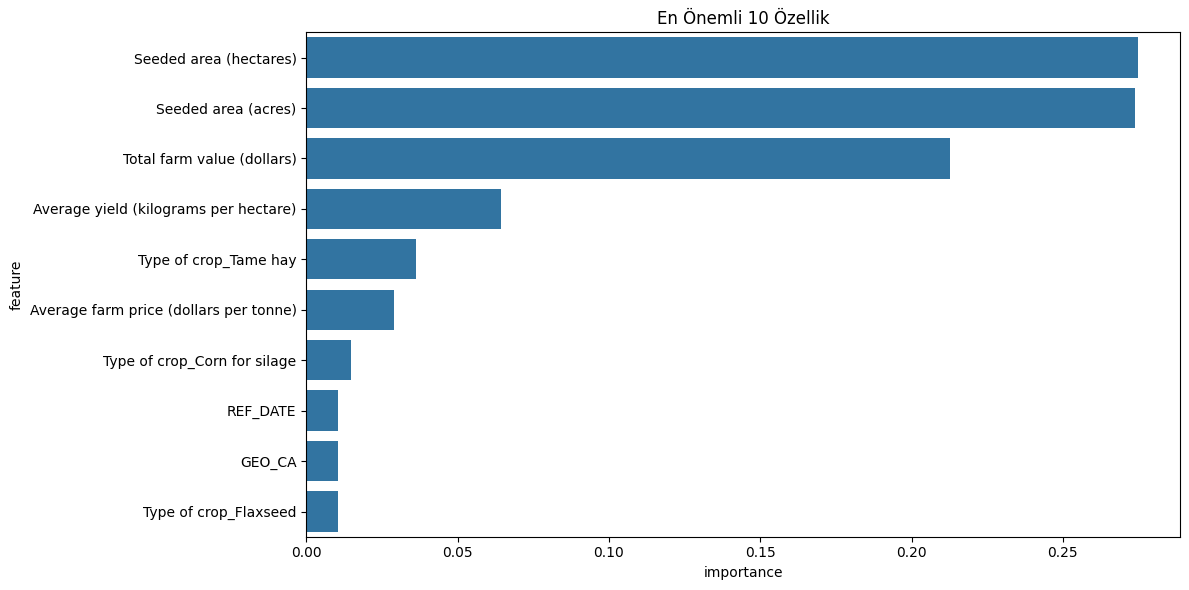

In [72]:
# En iyi model ile tahmin yapalım
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Model performansını değerlendirelim
print("\nTest seti performansı:")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Özellik önemliliklerini görelim
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
})

# Özellik önemliliklerini sıralayalım ve görselleştirelim
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('En Önemli 10 Özellik')
plt.tight_layout()
plt.show()

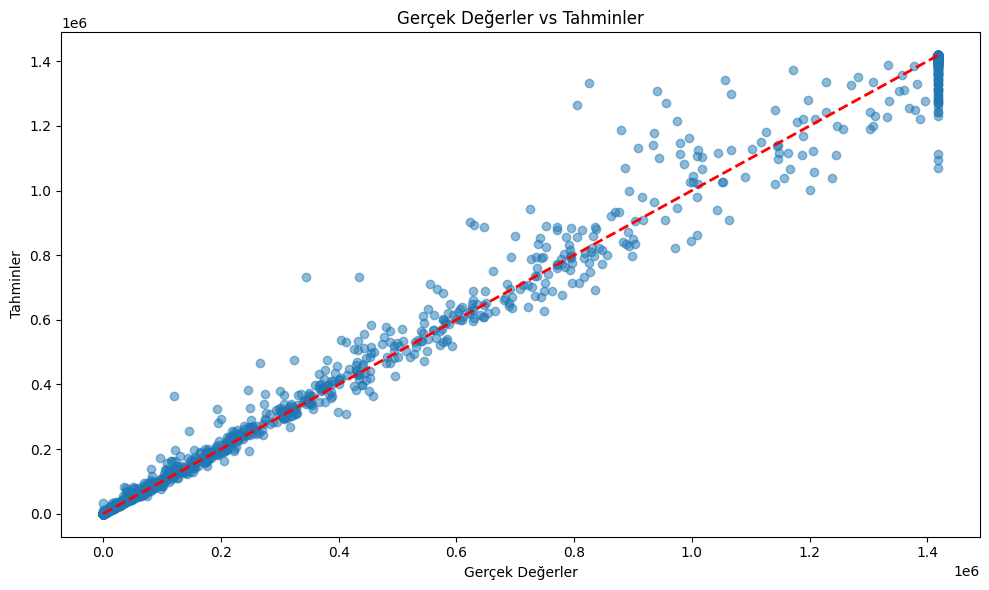

In [73]:
# Gerçek değerler vs Tahminler grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')
plt.title('Gerçek Değerler vs Tahminler')
plt.tight_layout()
plt.show()


5-Katlı Çapraz Doğrulama Sonuçları:
Her kattaki R2 skorları: [0.99282535 0.9915476  0.9922722  0.99333715 0.99245713]
Ortalama R2: 0.992487889239506
Standart Sapma: 0.0005944308760860235

RMSE Çapraz Doğrulama Sonuçları:
Her kattaki RMSE: [44439.65199963 47520.57834007 44895.34847663 43163.30051671
 44792.40498412]
Ortalama RMSE: 44962.25686343432
Standart Sapma: 1420.4009963430651


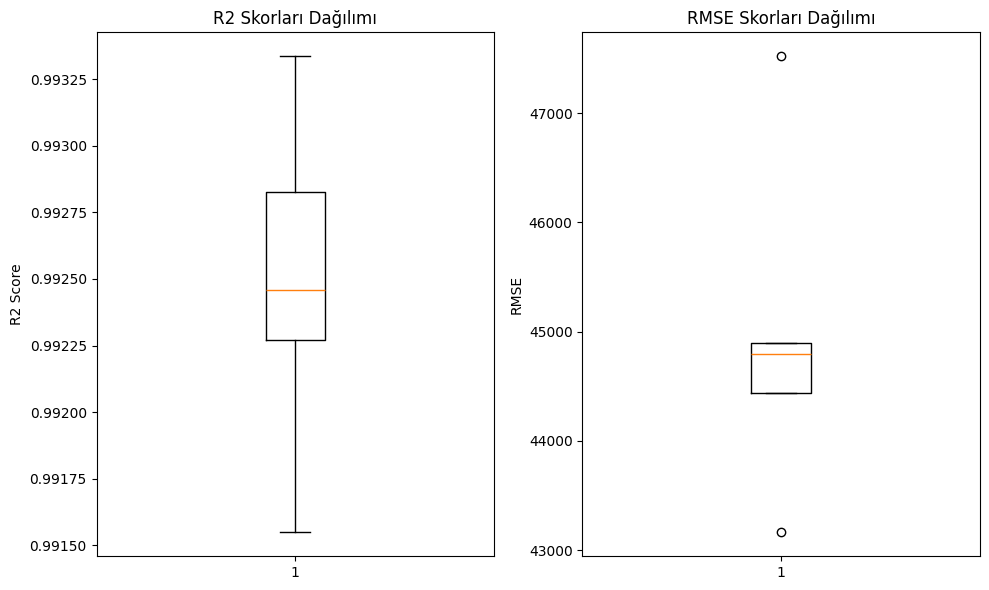

In [74]:
# En iyi model için 5-katlı çapraz doğrulama yapalım
from sklearn.model_selection import cross_val_score

# Çapraz doğrulama skorlarını hesaplayalım
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')

print('\n5-Katlı Çapraz Doğrulama Sonuçları:')
print('Her kattaki R2 skorları:', cv_scores)
print('Ortalama R2:', cv_scores.mean())
print('Standart Sapma:', cv_scores.std())

# Farklı metrikler için çapraz doğrulama yapalım
from sklearn.metrics import make_scorer, mean_squared_error

# RMSE için özel bir scorer oluşturalım
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)))

# RMSE için çapraz doğrulama
rmse_scores = cross_val_score(best_model, X_train_scaled, y_train, 
                            cv=5, scoring=rmse_scorer)

print('\nRMSE Çapraz Doğrulama Sonuçları:')
print('Her kattaki RMSE:', rmse_scores)
print('Ortalama RMSE:', rmse_scores.mean())
print('Standart Sapma:', rmse_scores.std())

# Çapraz doğrulama sonuçlarını görselleştirelim
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(cv_scores)
plt.title('R2 Skorları Dağılımı')
plt.ylabel('R2 Score')

plt.subplot(1, 2, 2)
plt.boxplot(rmse_scores)
plt.title('RMSE Skorları Dağılımı')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

Çapraz doğrulama sonuçlarınızı analiz edelim:

- R2 Skorları:

- Her kattaki R2 skorları oldukça yüksek ve tutarlı (0.991-0.993 aralığında)
- Ortalama R2: 0.9925 (99.25%)
- Çok düşük standart sapma (0.0006) modelin tutarlı performans gösterdiğini kanıtlıyor
- RMSE Sonuçları:

- RMSE değerleri 43,163 ile 47,520 arasında değişiyor
- Ortalama RMSE: 44,962
- Standart sapma: 1,420
Bu sonuçlar modelin çok iyi performans gösterdiğini ortaya koyuyor:

- Yüksek R2 değeri (0.9925) modelin varyansın %99.25'ini açıklayabildiğini gösteriyor
- Düşük R2 standart sapması (0.0006) modelin farklı veri setlerinde tutarlı performans sergilediğini kanıtlıyor
- RMSE değerleri üretim miktarına göre makul bir hata payını gösteriyor

Bu sonuçlara göre model:

1. Çok yüksek doğrulukla tahmin yapabiliyor
2. Farklı veri setlerinde tutarlı performans gösteriyor
3. Aşırı öğrenme (overfitting) belirtisi göstermiyor